2022年1月17日 記載

初めまして、B4のTです。
JoSIMの使い方とPythonでWrapperを作成したのでこちらに記していきます。

In [1]:
netlist="""
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

.subckt psquid  3  5 
L1                 3        1   1.75pH fcheck
L2                 3        4   1.75pH fcheck
B1                 1        5   jjmod area=0.5
R1                 1        5   15.88ohm
B2                 4        5   pjjmod area=0.5
R2                 4        5   15.88ohm
.ends

* Example JTL Basic
VIN                     1       0       pwl(0 0 300p 0 301p 0.5175mV 302p 0.5175mV 303p 0  400p 0 401p 0.5175mV 402p 0.5175mV 403p 0  500p 0 501p 0.5175mV 502p 0.5175mV 503p 0)
X1      psquid          1       0
L1                      1       2       18pH
R1                      2       100     50ohm
L2                      2       3       18pH
X2      psquid          3       0      
L3                      3       4       18pH
R2                      4       100     50ohm
L4                      4       5       18pH
X3      psquid          5       0       
R3                      5       6       8.32ohm
L5                      6       0       2pH
Vb                      100     0       pwl(0ps 0mV 100ps 1.0mV)

.tran 0.25p 1000p 0 0.25p
.print PHASE B1|X2
.print PHASE B2|X2

.print PHASE B1|X3
.print PHASE B2|X3

.end
"""

# Show the netlist data
# print(netlist)

pyjosimという簡単なWrapperパッケージを作成しました。こちらをインポートしてください。

In [4]:
from pyjosim.pyjosim import simulation

df = simulation(netlist)

# Show dataframe
# print(df)

<AxesSubplot:xlabel='time'>

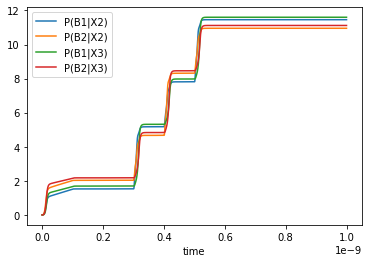

In [3]:
df.plot()